In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = r"..\07_CannyEdgeDetector\images\cm.jpg"
# imPth = r'C:\Users\DeLL\Desktop\ML\CV\images\cm.jpg'
img = plt.imread(path)

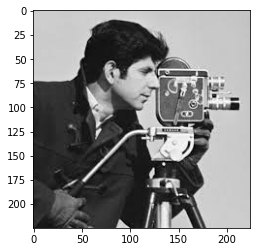

In [3]:
plt.imshow(img,cmap='gray')

In [4]:
#
# *Canny detector
E = cv2.Canny(img,150,250)

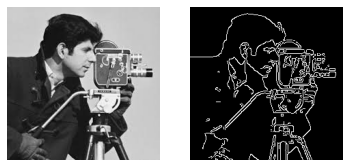

In [5]:
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(E,cmap='gray')
plt.axis('off')
plt.show()

In [6]:
x = 0
y = -1
sigma = 1
v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
v

0.09653235263005391

In [7]:
v

0.09653235263005391

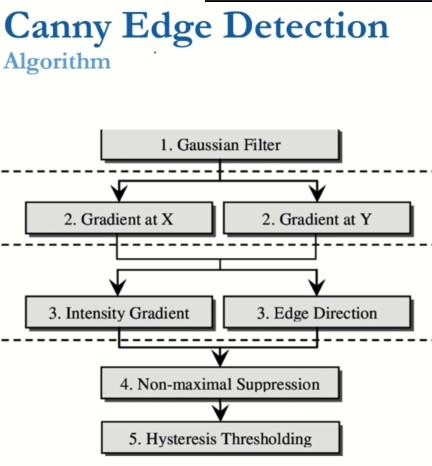

In [11]:
from IPython.display import Image

Image('Screenshot.jpg')

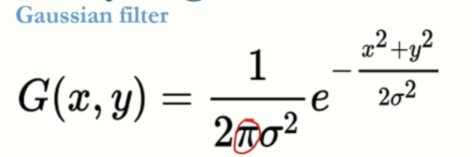

In [12]:
Image('Screenshot1.jpg')

In [16]:
def f_getGaussianFilter(s,sigma):
    """_summary_

    Args:
        s (_type_): window size
        sigma (float): control the width of the filter (kernal)

    Returns:
        _type_: _description_
    """
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    G = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (1/(2*np.pi*(sigma**2)))*\
                np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            G[x-minX,y-minY] = v
    return G

In [9]:
G = f_getGaussianFilter(11,2)

In [10]:
np.sum(G)

0.9891178756586588

In [13]:
cv2.getGaussianKernel?

Docstring:
getGaussianKernel(ksize, sigma[, ktype]) -> retval
.   @brief Returns Gaussian filter coefficients.
.   
.   The function computes and returns the \f$\texttt{ksize} \times 1\f$ matrix of Gaussian filter
.   coefficients:
.   
.   \f[G_i= \alpha *e^{-(i-( \texttt{ksize} -1)/2)^2/(2* \texttt{sigma}^2)},\f]
.   
.   where \f$i=0..\texttt{ksize}-1\f$ and \f$\alpha\f$ is the scale factor chosen so that \f$\sum_i G_i=1\f$.
.   
.   Two of such generated kernels can be passed to sepFilter2D. Those functions automatically recognize
.   smoothing kernels (a symmetrical kernel with sum of weights equal to 1) and handle them accordingly.
.   You may also use the higher-level GaussianBlur.
.   @param ksize Aperture size. It should be odd ( \f$\texttt{ksize} \mod 2 = 1\f$ ) and positive.
.   @param sigma Gaussian standard deviation. If it is non-positive, it is computed from ksize as
.   `sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8`.
.   @param ktype Type of filter coefficients. It can be CV_3

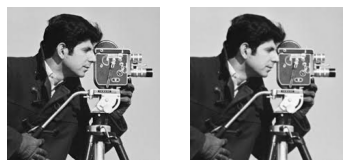

In [21]:
#
# * Gaussian convolution
G = f_getGaussianFilter(3,0.5)
img_S = cv2.filter2D(img,-1,G)

plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_S,cmap='gray')
plt.axis('off')
plt.show()

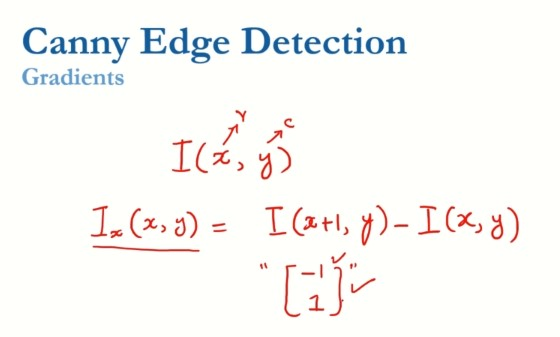

In [14]:
Image('Screenshot2.jpg')

In [22]:
img_S = img_S[:,:,0]
# to get gradient
mask_x = np.array([[-1],[1]])
mask_x

array([[-1],
       [ 1]])

In [15]:
# to handle negative values
img_S = np.float64(img_S)

# Fx
Ix = cv2.filter2D(img_S,-1,mask_x)
# Fy
mask_y = mask_x.T
Iy = cv2.filter2D(img_S,-1,mask_y)

In [16]:
Ix.dtype

dtype('float64')

In [17]:
Iy.shape

(225, 224)

In [18]:
img_S.shape

(225, 224)

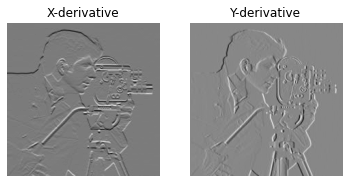

In [19]:
plt.subplot(121)
plt.imshow(Ix,cmap='gray')
plt.title('X-derivative')
plt.axis('off')
plt.subplot(122)
plt.imshow(Iy,cmap='gray')
plt.title('Y-derivative')
plt.axis('off')
plt.show()

In [20]:
gv = np.array([Ix[150,130],Iy[150,130]])

In [21]:
gv

array([-1., -2.])

In [22]:
Ix.dtype

dtype('float64')

In [ ]:
# we do gauusian first to remove noise
# to not to amplify the noise with the gradient
""" 
instead of using the gradient of the image after gauusian ,
 we can use the gradient of the gaussian
"""

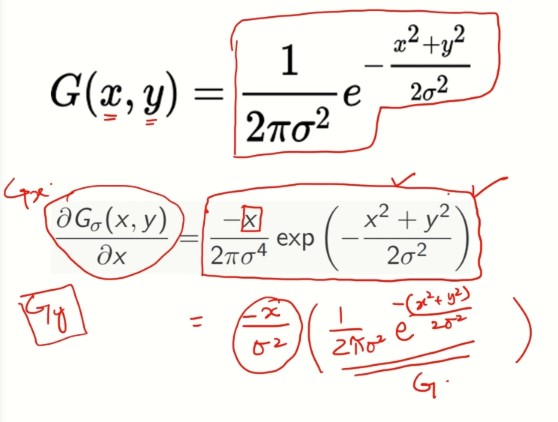

In [23]:
Image('Screenshot3.jpg')

In [29]:
def Gx(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    Gx = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (-x/(2*np.pi*(sigma**4)))*\
                np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            Gx[x-minX,y-minY] = v
    return Gx

In [30]:
def Gy(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    Gy = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (-y/(2*np.pi*(sigma**4)))*\
                np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            Gy[x-minX,y-minY] = v
    return Gy

In [31]:
gx = Gx(3,0.5)
gy = Gy(3,0.5)

In [32]:
gx

array([[ 0.04664039,  0.34462847,  0.04664039],
       [ 0.        ,  0.        ,  0.        ],
       [-0.04664039, -0.34462847, -0.04664039]])

In [33]:
gy

array([[ 0.04664039,  0.        , -0.04664039],
       [ 0.34462847,  0.        , -0.34462847],
       [ 0.04664039,  0.        , -0.04664039]])

In [28]:
img.shape

(225, 224, 3)

In [27]:
img = np.float64(img[:,:,0])

In [34]:
Ix = cv2.filter2D(img,-1,gx)
Iy = cv2.filter2D(img,-1,gy)

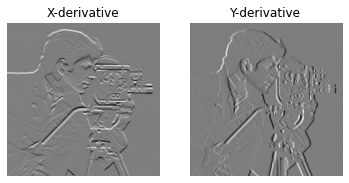

In [31]:
plt.subplot(121)
plt.imshow(Ix,cmap='gray')
plt.title('X-derivative')
plt.axis('off')
plt.subplot(122)
plt.imshow(Iy,cmap='gray')
plt.title('Y-derivative')
plt.axis('off')
plt.show()

In [35]:
# gradient magnitude
# (Fx**2 + Fy**2)^0.5
Gm = (Ix**2 + Iy**2)**0.5
# gradient direction
# arctan(Fy/Fx) == tan^-1
Gd = np.rad2deg(np.arctan2(Iy,Ix))

In [36]:
Gd.min(),Gd.max()

(-180.0, 180.0)

In [37]:
Gd.shape

(225, 224)

In [35]:
Gm.min(), Gm.max()

(0.0, 125.74349298140105)

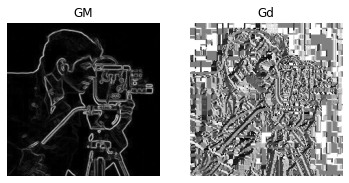

In [36]:
plt.subplot(121)
plt.imshow(Gm,cmap='gray')
plt.title('GM')
plt.axis('off')
plt.subplot(122)
plt.imshow(Gd,cmap='gray')
plt.title('Gd')
plt.axis('off')
plt.show()

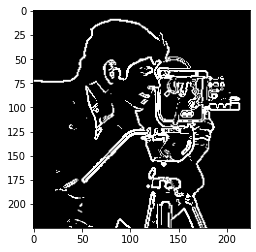

In [41]:
plt.imshow(Gm>30,cmap='gray')

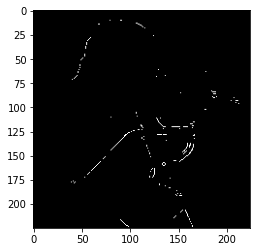

In [42]:
plt.imshow(Gm>90,cmap='gray')

(array([3342., 3883., 5338., 3533., 3560., 9223., 3602., 6601., 3571.,
        7747.]),
 array([-180., -144., -108.,  -72.,  -36.,    0.,   36.,   72.,  108.,
         144.,  180.]),
 <a list of 10 Patch objects>)

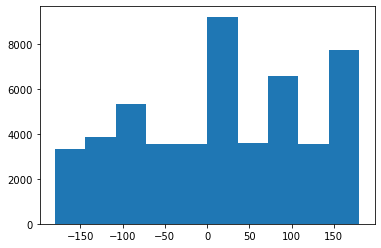

In [40]:
plt.hist(Gd.flatten())

In [41]:
# quantize the gradient direction
bins = np.array([-180.,-135.,-90.,-45.,0.,45.,90.,135.,180.])
# -1 is to index from 0 to 7
inds = np.digitize(Gd,bins)-1
Gd_bin = bins[inds.flatten()].reshape(Gd.shape)

In [45]:
# indecies
i,j = 10,100
Gd[i,j],Gd_bin[i,j]
# -22 is closer to -45

(-22.008208671455506, -45.0)

In [78]:
A = np.array([180.,134.,179.,135,-33.,-180.])
inds = np.digitize(A,bins)-1

In [79]:
# broken in 134 -> 90 should be 135
bins[inds]

array([ 180.,   90.,  135.,  135.,  -45., -180.])

In [80]:
#
# * this quantize better
A = np.array([180.,134.,179.,135,-33.,-180.,12,-12,-170])
A_bin = 45*(np.round(A/45))

In [81]:
A_bin

array([ 180.,  135.,  180.,  135.,  -45., -180.,    0.,   -0., -180.])

In [82]:
Gd_bin = 45*(np.round(Gd/45))

In [85]:
i,j = 12,100
Gd[i,j],Gd_bin[i,j]

(-15.96683566159695, -0.0)

In [44]:
def NMS(Gm,Gd):
    Gd_bin = 45*(np.round(Gd/45))
    Gm_NMS = np.zeros(Gm.shape)
    numRows,numCols = Gm.shape[0],Gm.shape[1]
    a,b=0.,0.
    for r in range(1,numRows-1):
        for c in range(1,numCols-1):
            ang = Gd_bin[r,c]
            if ang == 180. or ang == -180. or ang == 0.0 or ang == -0.0:
                # for vertical lines
                # move up and down
                a,b = Gm[r-1,c], Gm[r+1,c]
            elif ang == 45. or ang == -135.:
                # for 45 degree lines
                # move diagonally
                a,b = Gm[r+1,c+1],Gm[r-1,c-1]
            elif ang == 90. or ang == -90.:
                # for horizontal lines
                # move left and right
                a,b = Gm[r,c-1],Gm[r,c+1]
            elif ang == 135. or ang == -45.:
                # for -45 degree lines
                # move off diagonally
                a,b = Gm[r-1,c+1],Gm[r+1,c-1]
            else:
                print('Error')
                return
            if Gm[r,c] >= a and Gm[r,c] >= b:
                # if the pixel is greater than both the neighbours
                # then it is a local maximum
                # take a value
                Gm_NMS[r,c] = Gm[r,c]
            # *else it's zero "Supressed"
    return Gm_NMS

In [45]:
Gm_NMS = NMS(Gm,Gd)

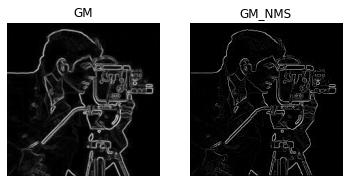

In [46]:
plt.subplot(121)
plt.imshow(Gm,cmap='gray')
plt.title('GM')
plt.axis('off')

plt.subplot(122)
plt.imshow(Gm_NMS,cmap='gray')
plt.title('GM_NMS')
plt.axis('off')
plt.show()

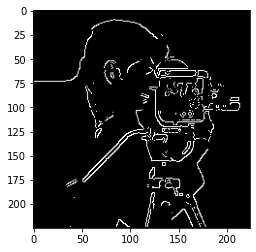

In [92]:
# the thershold it determined by the user
# how smooth the lines are
# the higher the threshold the less lines
# as it takes greater gradient values (bigger edges)
# the lower the threshold the more lines
plt.imshow(Gm_NMS>50,cmap='gray')

In [50]:
from skimage import filters

ModuleNotFoundError: No module named 'skimage'

In [94]:
# make 2 line values for threshold
# recursive thresholding
L = Gm_NMS.mean()
H = L + Gm_NMS.std()
E = filters.apply_hysteresis_threshold(Gm_NMS,L,H)

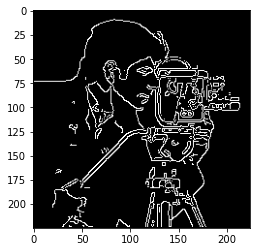

In [95]:
plt.imshow(E,cmap='gray')